In [1]:
import pandas as pd
import numpy as np
import nltk
import os
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest, chi2


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aom2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
for f in os.listdir("content"):
    print(f)

BinMLResultsada_tfidf_binmat.png
BinMLResultsgb_tfidf_binmat.png
BinMLResultsknn_tfidf_binmat.png
BinMLResultslr_tfidf_binmat.png
BinMLResultsnb_tfidf_binmat.png
BinMLResultsrf_tfidf_binmat.png
BinMLResultssvm_countvec_binmat.png
BinMLResultssvm_tfidf_binmat.png
final_testset.xlsx
final_trainset.xlsx


In [3]:
df_bin = pd.read_excel("content/final_trainset.xlsx")
df_bin['binary2_label'].value_counts()
df_test = pd.read_excel("content/final_testset.xlsx")
df_bin['ABSTRACT'] = df_bin['ABSTRACT'].apply(str.lower)
df_test['ABSTRACT'] = df_test['ABSTRACT'].apply(str.lower)

In [4]:
list(df_test['ABSTRACT'])

['all descriptions of the lambert-eaton syndrome are based on symptomatic patients. we incidentally encountered electromyographic evidence of this syndrome in a patient being studied for another reason. the patient had controlled hypothyroidism and smoked for 9 pack-years but never had symptoms of weakness or had evidence of cancer. detailed electrophysiological and serological evaluations were undertaken in this study. neuromuscular transmission tests were consistent with a presynaptic disorder. autoantibodies specific for p/q-type voltage-gated calcium channels (vgcc) were detected in the serum and persisted throughout 7 years of follow-up. multiple igg markers of thyrogastric autoimmunity also were detected. this demonstration of asymptomatic lambert-eaton syndrome persisting for 8 years provided novel insight into the natural history of the disorder. it is plausible that patients with a subclinical syndrome would have abrupt neuromuscular decompensation when challenged with medicat

In [9]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import scikitplot as skplt

def bin_model( model_type, vectortype, C=1, gamma=1, kernel='rbf', select_features=8150):
    # Vectorization
    if vectortype == "tfidf":
        vectorizer = TfidfVectorizer()
    elif vectortype == "countvec":
        vectorizer = CountVectorizer()
        
    X_train = vectorizer.fit_transform(df_bin['ABSTRACT'])
    y_train = df_bin['binary2_label']
    feature_names = vectorizer.get_feature_names_out()
    
    # Feature Selection
    selector = SelectKBest(score_func=chi2, k=select_features)
    X_train_sel = selector.fit_transform(X_train, y_train)
    
    # Get the mask of the selected features
    selected_mask = selector.get_support()
    selected_features = feature_names[selected_mask]

    # Model Training
    if model_type == 'nb':
        model = MultinomialNB()
    elif model_type == 'lr':
        model = LogisticRegression(max_iter=1000)
    elif model_type == 'svm':
        model = SVC(C=C, gamma=gamma, kernel=kernel)  # Use the specific SVM parameters
    elif model_type == 'knn':
        model = KNeighborsClassifier(n_neighbors=7)
    elif model_type == 'rf':
        model = RandomForestClassifier()
    elif model_type == 'ada':
        model = AdaBoostClassifier(n_estimators=50)
    elif model_type == 'gb':
        model = GradientBoostingClassifier(n_estimators=50)

    model.fit(X_train_sel, y_train)
    print('Training Accuracy:', model.score(X_train_sel, y_train))

    # Applying the same transformation to the test data
    X_test = vectorizer.transform(df_test['ABSTRACT'])
    X_test_sel = selector.transform(X_test)
    y_test = df_test['binary2_label']
    y_pred = model.predict(X_test_sel)

    # Evaluation
    print('Test Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred, average="macro"))
    print('Precision:', precision_score(y_test, y_pred, average="macro"))
    print('Recall:', recall_score(y_test, y_pred, average="macro"))

    # Confusion Matrix Plot
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                        title="Binary Confusion Matrix",
                                        ax=ax1)
    plt.savefig('content/BinMLResults' + model_type + '_' + vectortype + '_binmat.png')

    return X_train, y_train, feature_names, X_train_sel, y_pred, selected_features


Training Accuracy: 0.6493309770260035
Test Accuracy: 0.6514423076923077
F1 score: 0.5452866458105612
Precision: 0.7726956279587858
Recall: 0.5925939058695601


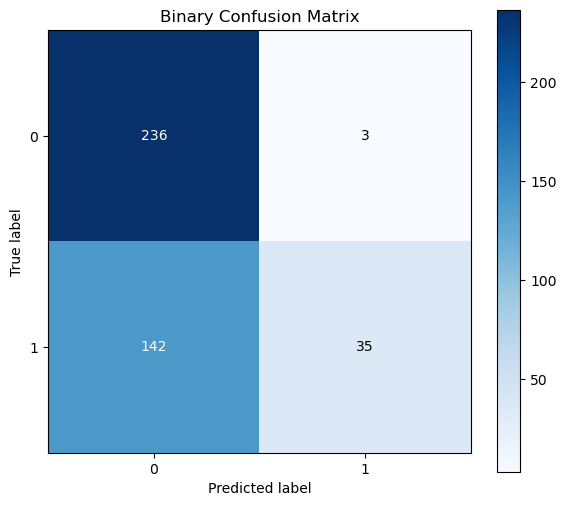

In [10]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('svm', 'tfidf',C=0.05)#c=0.05

Training Accuracy: 0.759656652360515
Test Accuracy: 0.7355769230769231
F1 score: 0.7049645390070922
Precision: 0.763221558719951
Recall: 0.7031888991324492


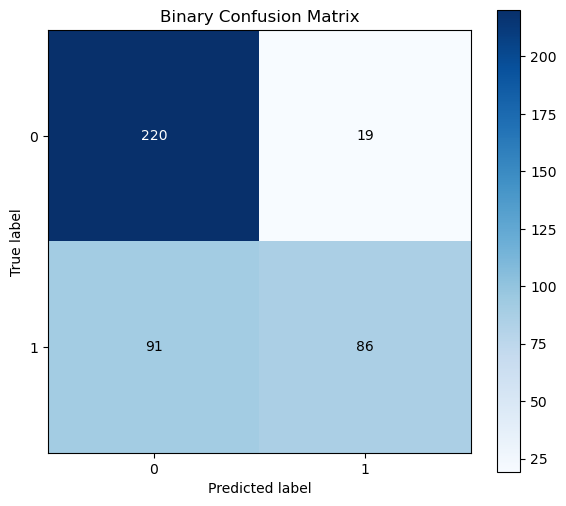

In [11]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('svm', 'tfidf',C=0.1)#c=0.1

Training Accuracy: 0.9139106286291341
Test Accuracy: 0.7932692307692307
F1 score: 0.78358497870693
Precision: 0.7950018742971385
Recall: 0.7790464033283692


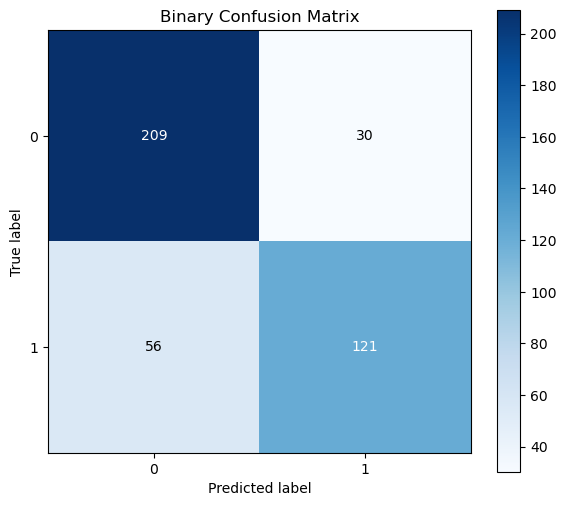

In [12]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('svm', 'tfidf',C=1)

In [13]:
 X_train.shape

(7922, 39504)

In [14]:
 X_train_sel.shape

(7922, 8150)

In [15]:
feature_names[1000:2000]

array(['1887', '1889', '189', '1896', '1897', '18c', '18f', '18fdg',
       '18months', '18p', '18q', '18q12', '18s', '18th', '18x10', '18y',
       '18y11m', '18years', '19', '190', '1900s', '1902', '1903', '1906',
       '1906s', '1907', '1908', '191', '1911', '1912', '1913', '1914',
       '1916', '1917', '192', '1920', '1921', '1923', '1924', '1925',
       '1927', '1928', '1929', '193', '1930', '1931', '1932', '1933',
       '1934', '1935', '1936', '1938', '1939', '194', '1940', '194050',
       '1940s', '1941', '1944', '1945', '1946', '1947', '1948', '1949',
       '195', '1950', '1952', '1953', '1954', '1955', '1956', '1957',
       '1958', '1959', '196', '1960', '1960s', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '197', '1970',
       '1970s', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '198', '1980', '1980s', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '198_218del21',
    

In [16]:
selected_features

array(['0001', '0007', '0008', ..., 'œîhrr1', 'œîiop', 'œîpi'],
      dtype=object)

Training Accuracy: 0.8307245645039132
Test Accuracy: 0.7956730769230769
F1 score: 0.7844309917027878
Precision: 0.801266339869281
Recall: 0.7789400278940029


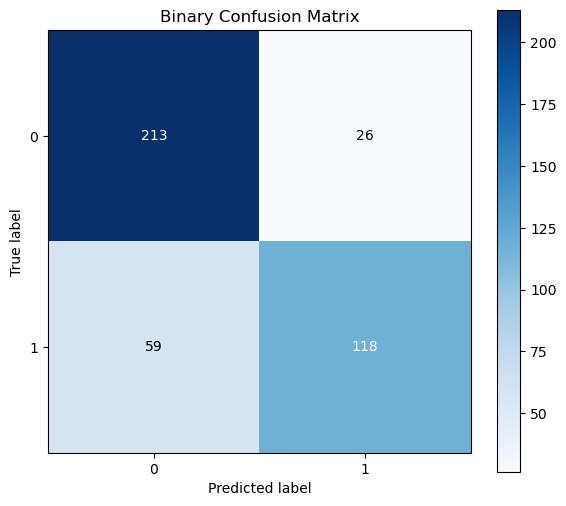

In [17]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('lr', 'tfidf',select_features=8000)

Training Accuracy: 0.8307245645039132
Test Accuracy: 0.7956730769230769
F1 score: 0.7844309917027878
Precision: 0.801266339869281
Recall: 0.7789400278940029


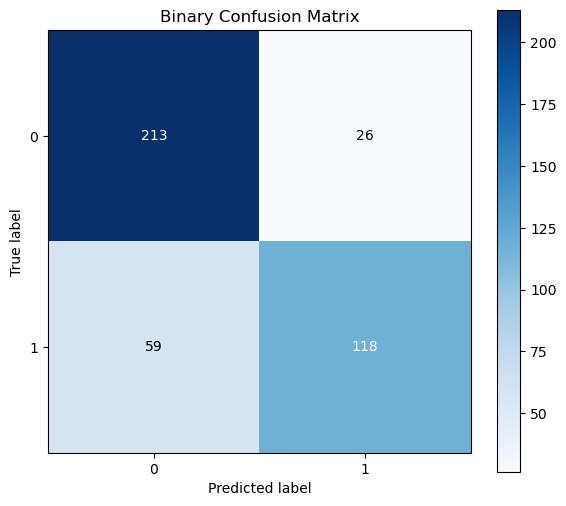

In [140]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('lr', 'tfidf',select_features=8000)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 0.7850290330724564
Test Accuracy: 0.7451923076923077
F1 score: 0.7338162501509116
Precision: 0.7424389274087329
Recall: 0.7306101222135546


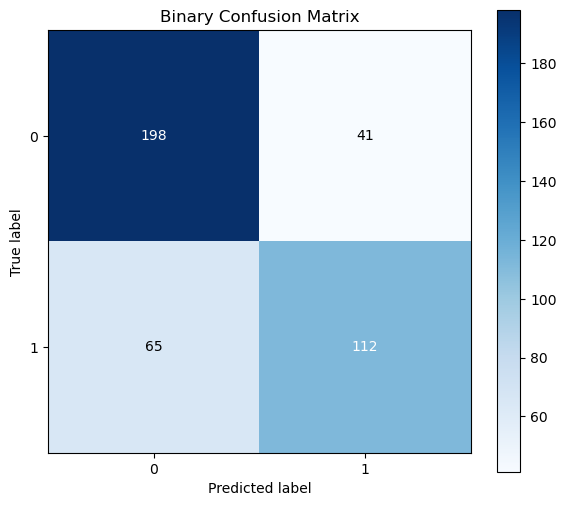

In [141]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('ada', 'tfidf',select_features=8000)

Training Accuracy: 0.7971471850542792
Test Accuracy: 0.7596153846153846
F1 score: 0.7488832548593505
Precision: 0.7579462710305922
Recall: 0.7453608491123561


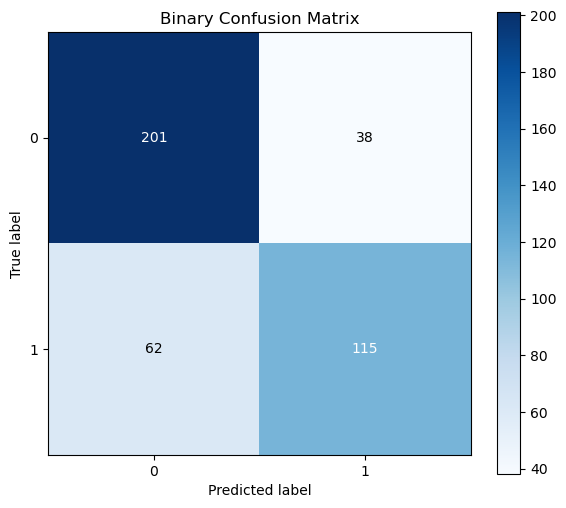

In [142]:
X_train, y_train, feature_names,X_train_sel, y_pred,selected_features=bin_model('gb', 'tfidf',select_features=8000)